### Example 3.10: Disk Drive Read System

A disk drive read system has the following parameters:
- k = 10 kg/m (spring constant)
- M1 = 0.02 kg (mass of read head)
- M2 = 0.0005 kg (secondary mass)
- b1 = 410e-3 kg/m/s (damping coefficient 1)
- b2 = 4.1e-3 kg/m/s (damping coefficient 2)

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
k = 10  # kg/m
M1 = 0.02  # kg
M2 = 0.0005  # kg
b1 = 410e-3  # kg/m/s
b2 = 4.1e-3  # kg/m/s

# State Space Model
# States: [x1, x2, x1_dot, x2_dot]
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-k/M1, k/M1, -b1/M1, 0],
    [k/M2, -k/M2, 0, -b2/M2]
])

B = np.array([[0], [0], [1/M1], [0]])
C = np.array([[0, 0, 0, 1]])  # Output is x2_dot (velocity)
D = np.array([[0]])

sys = ct.ss(A, B, C, D)
print(sys)

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.00e+00  0.00e+00  1.00e+00  0.00e+00]
     [ 0.00e+00  0.00e+00  0.00e+00  1.00e+00]
     [-5.00e+02  5.00e+02 -2.05e+01  0.00e+00]
     [ 2.00e+04 -2.00e+04  0.00e+00 -8.20e+00]]

B = [[ 0.]
     [ 0.]
     [50.]
     [ 0.]]

C = [[0. 0. 0. 1.]]

D = [[0.]]


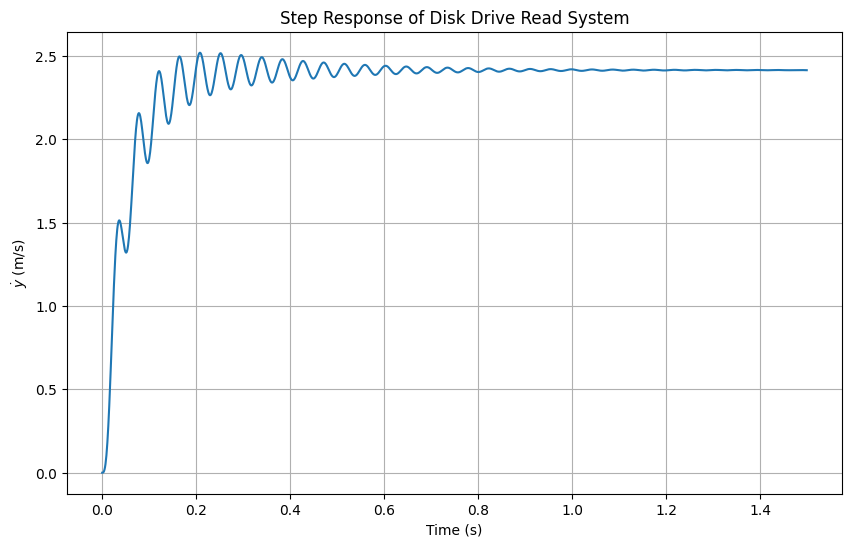

In [2]:
# Simulated Step Response
t = np.arange(0, 1.5, 0.001)
t_out, y_out = ct.step_response(sys, t)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_out, y_out)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel(r'$\dot{y}$ (m/s)')
plt.title('Step Response of Disk Drive Read System')
plt.show()